Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
`https://github.com/squillero/computational-intelligence`  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
NUM_FRIENDS = 6

In [2]:
from itertools import product, combinations
from multiset import Multiset
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

ModuleNotFoundError: No module named 'multiset'

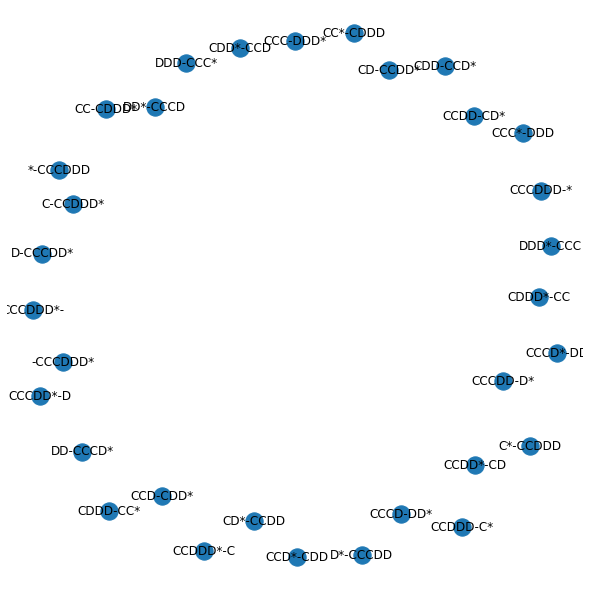

In [ ]:
def node2sets(node):
    pizzeria, pub = node.split("-")
    return Multiset(pizzeria), Multiset(pub)


def sets2node(pizzeria, pub):
    return "".join(sorted(pizzeria)) + "-" + "".join(sorted(pub))


sspace = nx.Graph()
for c, d, b in product(range(NUM_FRIENDS // 2 + 1), range(NUM_FRIENDS // 2 + 1), [True, False]):
    pizzeria = "C" * c + "D" * d + ("*" if b else "")
    pub = "C" * (NUM_FRIENDS // 2 - c) + "D" * (NUM_FRIENDS // 2 - d) + ("*" if not b else "")
    sspace.add_node(pizzeria + "-" + pub)

plt.figure(figsize=(8, 8))
nx.draw(sspace, with_labels=True)

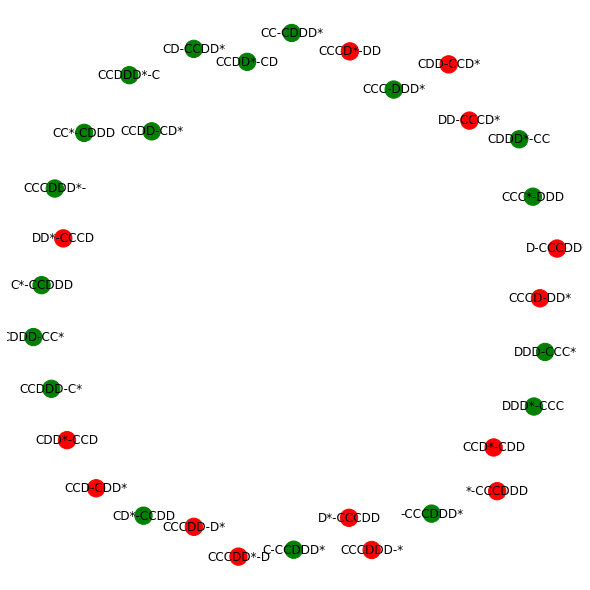

In [ ]:
def valid_node(node):
    pizzeria, pub = node.split("-")
    if pizzeria == "*" or pub == "*":
        return False
    pizzeria, pub = node.split("-")
    return valid_location(pizzeria) and valid_location(pub)


def valid_location(place):
    if place.count("D") == 0:
        return True
    elif place.count("D") >= place.count("C"):
        return True
    return False


plt.figure(figsize=(8, 8))
nx.draw(
    sspace,
    with_labels=True,
    node_color=["green" if valid_node(n) else "red" for n in sspace],
)

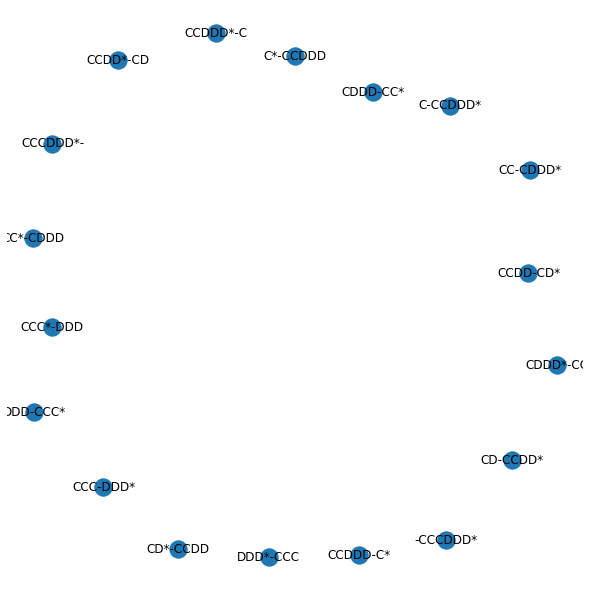

In [ ]:
sspace = nx.Graph()

for c, d, b in product(range(NUM_FRIENDS // 2 + 1), range(NUM_FRIENDS // 2 + 1), [True, False]):
    pizzeria = "C" * c + "D" * d + ("*" if b else "")
    pub = "C" * (NUM_FRIENDS // 2 - c) + "D" * (NUM_FRIENDS // 2 - d) + ("*" if not b else "")
    node = pizzeria + "-" + pub
    if valid_node(node):
        sspace.add_node(node)

plt.figure(figsize=(8, 8))
nx.draw(sspace, with_labels=True)

In [ ]:
def bike(from_, to):
    if "*" in from_[1]:
        return bike((from_[1], from_[0]), (to[1], to[0]))
    if "*" not in from_[0]:
        return None
    if "*" not in to[1]:
        return None
    if not to[0] <= from_[0]:
        return None
    moved = from_[0] - to[0]
    if not 2 <= len(moved) <= 3:
        return None
    if from_[1] + moved != to[1]:
        return None
    return "".join(sorted(moved))

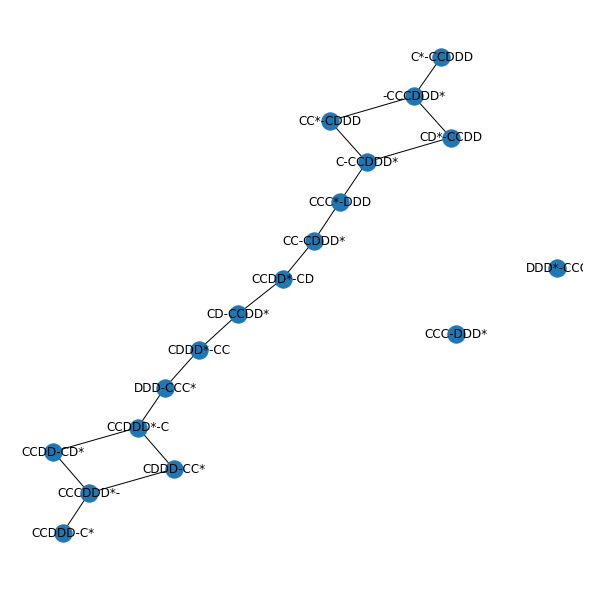

In [ ]:
for n1, n2 in combinations(sspace, 2):
    if bike(node2sets(n1), node2sets(n2)) is not None:
        sspace.add_edge(n1, n2, label=bike(node2sets(n1), node2sets(n2)))

plt.figure(figsize=(8, 8))
nx.draw(sspace, pos=graphviz_layout(sspace, prog="neato"), with_labels=True)

In [ ]:
SOURCE = "C" * (NUM_FRIENDS // 2) + "D" * (NUM_FRIENDS // 2) + "*" + "-"
DESTINATION = "-" + "C" * (NUM_FRIENDS // 2) + "D" * (NUM_FRIENDS // 2) + "*"
nx.shortest_path(sspace, SOURCE, DESTINATION)

['CCCDDD*-',
 'CDDD-CC*',
 'CCDDD*-C',
 'DDD-CCC*',
 'CDDD*-CC',
 'CD-CCDD*',
 'CCDD*-CD',
 'CC-CDDD*',
 'CCC*-DDD',
 'C-CCDDD*',
 'CD*-CCDD',
 '-CCCDDD*']

In [ ]:
all_shortest_paths = list(nx.all_shortest_paths(sspace, SOURCE, DESTINATION))
len(all_shortest_paths)

4